In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [13]:

data = pd.read_csv("studentTestQuestion.csv", sep=";")

print("Prvih 5 redaka:")
display(data.head())

# Želimo provjeriti gdje se pojavljuju prazne ćelije u svrhe čišćenja
print("Broj praznih ćelija po atributu:")
print(data.isna().sum())

# Provjera imamo li dupliciranih redaka
print("Broj duplikata: " + str(data.duplicated().sum()))

Prvih 5 redaka:


,id_test,id_test_instance,id_academic_year,title,id_student,test_max_score,test_score_ed,test_score_man,test_score_perc_ed,test_score_perc_man,id_question,student_answer_code,id_app_user,question_score_ed,question_score_man,question_score_perc_ed,question_score_perc_man,diff_perc
0,14530,332559,2023,Završni ispit 2023/24 - drugi termin,10127,40.0,30.0,0.0,0.75,0.00,47999,\r\n\r\n\r\n\r\n#include <ctype.h>\r\n#include...,1176.0,10.0,0.0,1.0,0.0,1.0
1,14529,330776,2023,Završni ispit 2023/24 - prvi termin,8863,40.0,30.0,22.0,0.75,0.55,48002,"int k = 0;\r\n long long int polje[48] = {0, 1...",1030.0,10.0,0.0,1.0,0.0,1.0
2,14530,331780,2023,Završni ispit 2023/24 - drugi termin,9050,40.0,30.0,20.0,0.75,0.50,48011,#include <stdio.h>\r\n#include <stdlib.h>\r\n\...,1003.0,10.0,0.0,1.0,0.0,1.0
3,14530,332559,2023,Završni ispit 2023/24 - drugi termin,10127,40.0,30.0,0.0,0.75,0.00,48011,#include <stdio.h>\r\n#include <stdlib.h>\r\n\...,1176.0,10.0,0.0,1.0,0.0,1.0
4,14530,332559,2023,Završni ispit 2023/24 - drugi termin,10127,40.0,30.0,0.0,0.75,0.00,48019,\r\n\r\n\r\n\r\nint brojiDjelj3Kumulativno(int...,1176.0,10.0,0.0,1.0,0.0,1.0


Broj praznih ćelija po atributu:
id_test                     0
id_test_instance            0
id_academic_year            0
title                       0
id_student                  0
test_max_score              0
test_score_ed               0
test_score_man              0
test_score_perc_ed          0
test_score_perc_man         0
id_question                 0
student_answer_code         3
id_app_user                10
question_score_ed           0
question_score_man          0
question_score_perc_ed      0
question_score_perc_man     0
diff_perc                   0
dtype: int64
Broj duplikata: 0


Prazne student_answer_code ćelije nisu problem.
Prazne id_app_user ćelije jedino predstavljaju problem radimo podjelu po ocjenjivačima pa će ti retci biti izbačeni.

In [14]:
n_years = data["id_academic_year"].nunique()
n_tests = data["id_test"].nunique()
n_questions = data["id_question"].nunique()
n_teachers = data["id_app_user"].nunique()
n_students = data["id_student"].nunique()
print(f"#godina = {n_years}")
print(f"#ispita = {n_tests}")
print(f"#zadataka = {n_questions}")
print(f"#ocjenjivača = {n_teachers}")
print(f"#studenata = {n_students}")

#godina = 2
#ispita = 6
#zadataka = 22
#ocjenjivača = 22
#studenata = 779


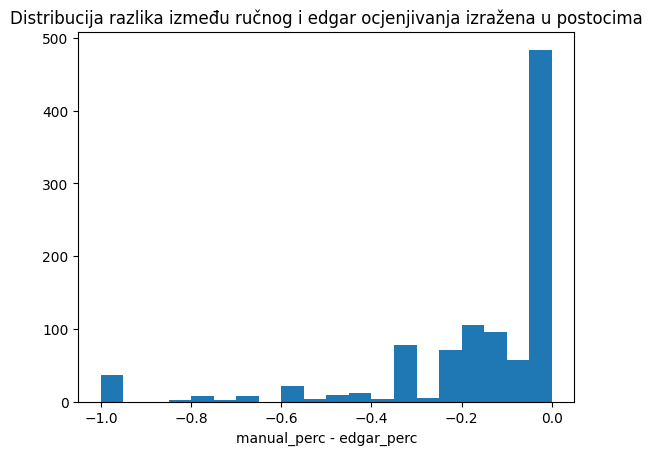

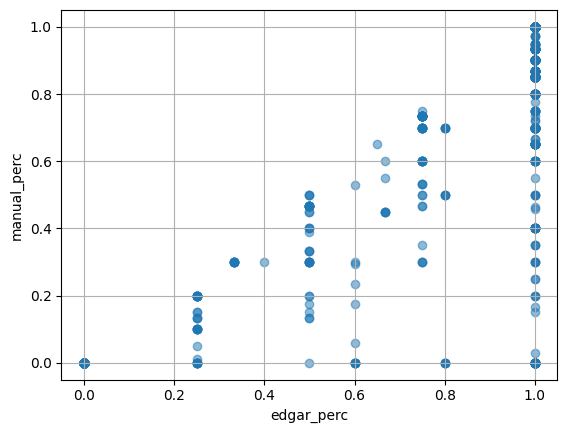

Manual-Edgar osnovne statistike:
count    1000.000000
mean       -0.147756
std         0.232851
min        -1.000000
25%        -0.200000
50%        -0.050000
75%         0.000000
max        -0.000000
Name: diff_perc, dtype: float64


In [15]:
plt.figure()
plt.hist(-data["diff_perc"], bins=20)
plt.title("Distribucija razlika između ručnog i edgar ocjenjivanja izražena u postocima")
plt.xlabel("manual_perc - edgar_perc")
plt.show()

plt.figure()
plt.scatter(data["question_score_perc_ed"], data["question_score_perc_man"], alpha=0.5)
plt.xlabel("edgar_perc")
plt.ylabel("manual_perc")
plt.grid(True)
plt.show()

print("Manual-Edgar osnovne statistike:")
print((-data["diff_perc"]).describe())

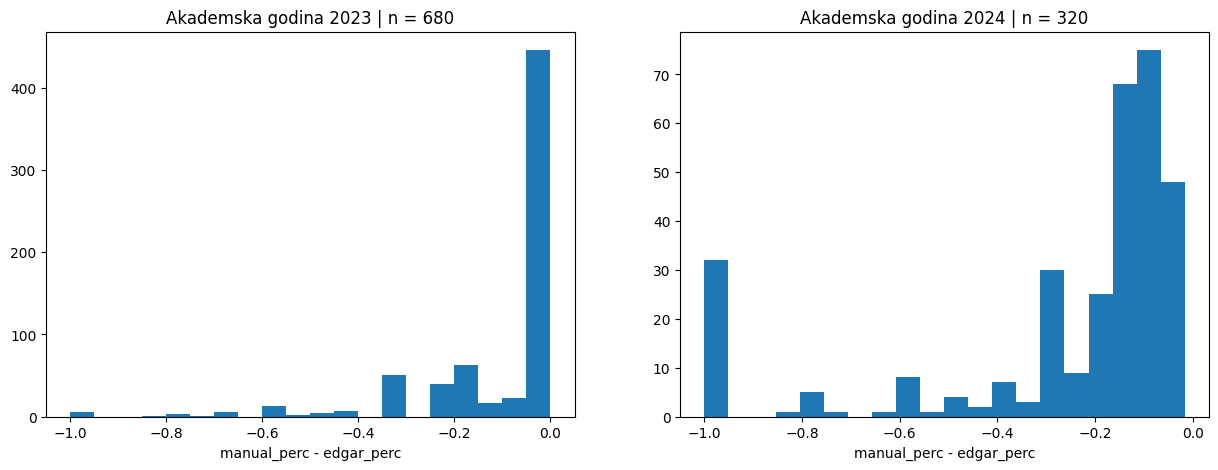

Akademska godina 2023: 15 ocjenjivača
Akademska godina 2024: 12 ocjenjivača

Zajedničkih ocjenjivača između 2023 i 2024: 5


In [16]:
data_by_year = {
    id_academic_year: d
    for id_academic_year, d in data.groupby("id_academic_year")
}

cols = 2
rows = math.ceil(len(data_by_year) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.3)

for ax, (year, d) in zip(axes, data_by_year.items()):
    ax.hist(-d["diff_perc"], bins=20)
    ax.set_title(f"Akademska godina {year} | n = {len(d)}")
    ax.set_xlabel("manual_perc - edgar_perc")

plt.show()

# Ako je razlika razlike manual i edgar ocjenjivanja između godina velika
# Onda možda to objašnjava razlika ocjenjivača? (ili je možda do zadataka)
teachers_by_year = {
    year: set(d["id_app_user"].dropna())
    for year, d in data_by_year.items()
}

years = sorted(teachers_by_year)

for year in years:
    n_teachers = len(teachers_by_year[year])
    print(f"Akademska godina {year}: {n_teachers} ocjenjivača")

print()

for y1, y2 in zip(years, years[1:]):
    mutual = teachers_by_year[y1] & teachers_by_year[y2]
    print(
        f"Zajedničkih ocjenjivača između {y1} i {y2}: {len(mutual)}"
    )

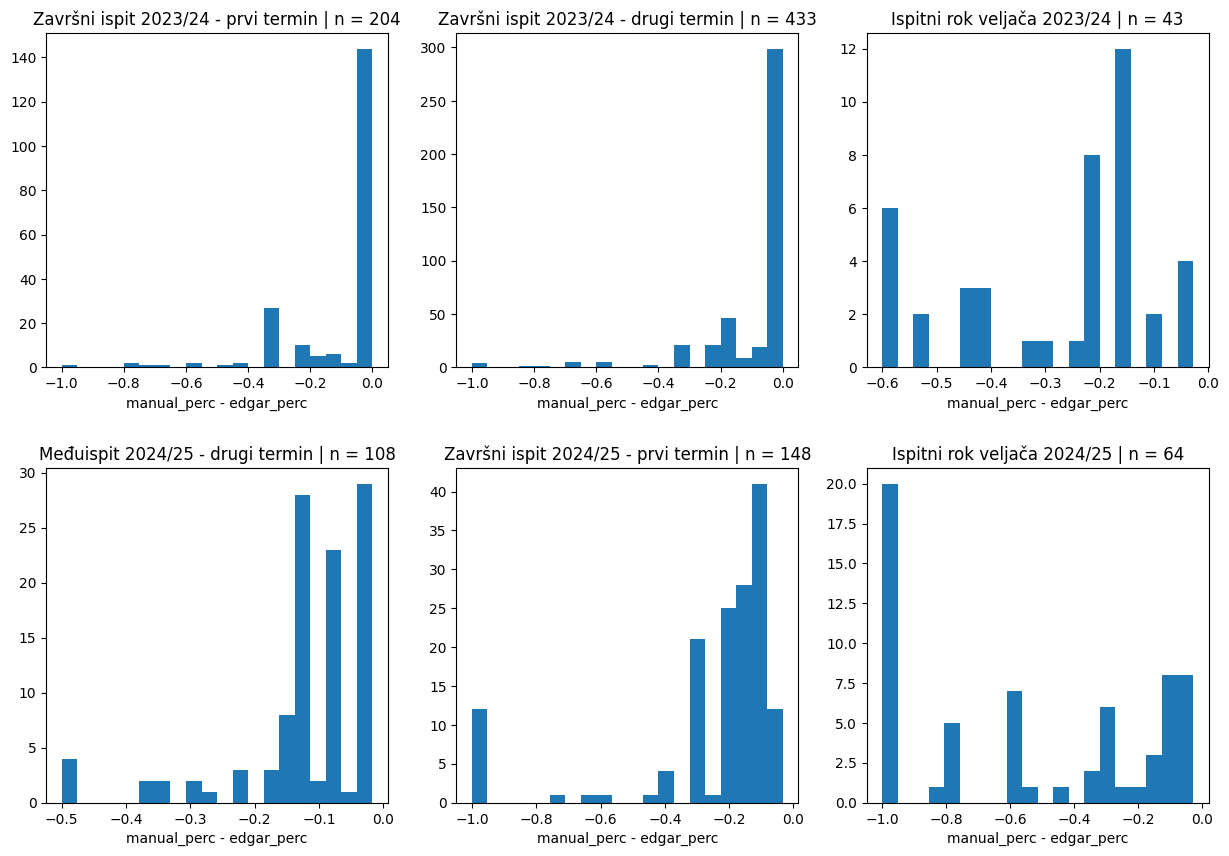

Završni ispit 2023/24 - prvi termin: 8 ocjenjivača
Završni ispit 2023/24 - drugi termin: 8 ocjenjivača
Ispitni rok veljača 2023/24: 9 ocjenjivača
Međuispit 2024/25 - drugi termin: 6 ocjenjivača
Završni ispit 2024/25 - prvi termin: 7 ocjenjivača
Ispitni rok veljača 2024/25: 8 ocjenjivača

Zajedničkih ocjenjivača između Završni ispit 2023/24 - prvi termin i Završni ispit 2023/24 - drugi termin: 2
Zajedničkih ocjenjivača između Završni ispit 2023/24 - drugi termin i Ispitni rok veljača 2023/24: 4
Zajedničkih ocjenjivača između Ispitni rok veljača 2023/24 i Međuispit 2024/25 - drugi termin: 1
Zajedničkih ocjenjivača između Međuispit 2024/25 - drugi termin i Završni ispit 2024/25 - prvi termin: 4
Zajedničkih ocjenjivača između Završni ispit 2024/25 - prvi termin i Ispitni rok veljača 2024/25: 5


In [17]:
data_by_test = {
    id_test: {
        "data": d,
        "title": d["title"].iloc[0]
    }
    for id_test, d in data.groupby("id_test")
}

cols = 3
rows = math.ceil(len(data_by_test) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

for ax, (_, struct) in zip(axes, data_by_test.items()):
    ax.hist(-struct["data"]["diff_perc"], bins=20)
    ax.set_title(f"{struct['title']} | n = {len(struct['data'])}")
    ax.set_xlabel("manual_perc - edgar_perc")

plt.show()


teachers_by_test = {
    id_test: {
        "title": struct["title"],
        "teachers": set(struct["data"]["id_app_user"].dropna())
    }
    for id_test, struct in data_by_test.items()
}

ordered_tests = sorted(teachers_by_test)

for tid in ordered_tests:
    n_teachers = len(teachers_by_test[tid]["teachers"])
    title = teachers_by_test[tid]["title"]
    print(f"{title}: {n_teachers} ocjenjivača")

print()

for t1, t2 in zip(ordered_tests, ordered_tests[1:]):
    mutual = (
        teachers_by_test[t1]["teachers"]
        & teachers_by_test[t2]["teachers"]
    )
    print(
        f"Zajedničkih ocjenjivača između "
        f"{teachers_by_test[t1]['title']} i "
        f"{teachers_by_test[t2]['title']}: {len(mutual)}"
    )

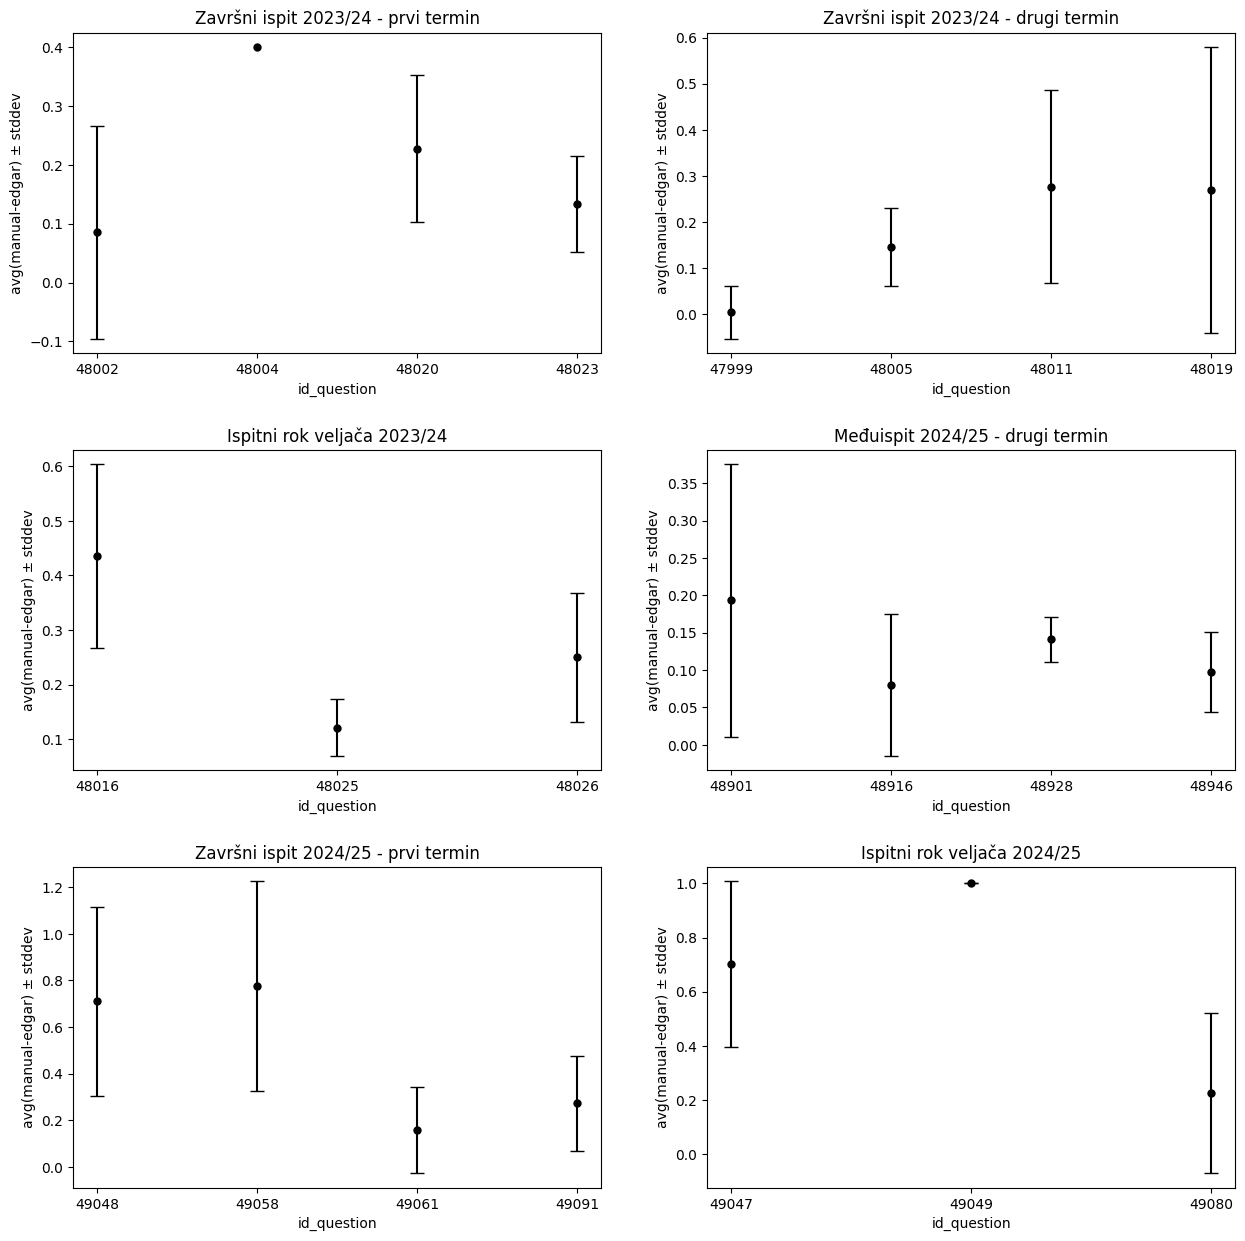

Avg of means: 0.6428 (stddev: 0.3902)
Avg of stddevs: 0.2008 (stddev: 0.1740)

Broj zadataka s 1 različitih ocjenjivača: 3
Broj zadataka s 2 različitih ocjenjivača: 1
Broj zadataka s 3 različitih ocjenjivača: 3
Broj zadataka s 4 različitih ocjenjivača: 2
Broj zadataka s 5 različitih ocjenjivača: 4
Broj zadataka s 6 različitih ocjenjivača: 4
Broj zadataka s 7 različitih ocjenjivača: 3
Broj zadataka s 8 različitih ocjenjivača: 2

Korelacija između stddev(diff) i broja ocjenjivača: -0.057


In [18]:
cols = 2
rows = math.ceil(n_tests / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.3)
axes = axes.flatten()

for ax, (id_test, struct) in zip(axes, data_by_test.items()):
    stats_by_question = (
        struct["data"].groupby("id_question")["diff_perc"]
        .agg(["mean", "std"])
        .rename(columns={"mean": "mean_diff", "std": "std_diff"})
    )
    
    x_pos = range(len(stats_by_question))
    y = stats_by_question["mean_diff"]
    yerr = stats_by_question["std_diff"]

    ax.errorbar(x_pos, y, yerr=yerr, fmt='o', color='black', capsize=5, markersize=5)
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(stats_by_question.index)
    ax.set_xlabel("id_question")
    ax.set_ylabel("avg(manual-edgar) ± stddev")
    ax.set_title(struct["title"])

for ax in axes[n_tests:]:
    ax.remove()

plt.show()


# Zanimljivo je vidjeti nekonzistentnost između razlike ocjenjivača i edgara po zadacima
avg_of_means = stats_by_question["mean_diff"].mean()
std_of_means = stats_by_question["mean_diff"].std()

avg_of_stddevs = stats_by_question["std_diff"].mean()
std_of_stddevs = stats_by_question["std_diff"].std()

print(f"Avg of means: {avg_of_means:.4f} (stddev: {std_of_means:.4f})")
print(f"Avg of stddevs: {avg_of_stddevs:.4f} (stddev: {std_of_stddevs:.4f})")
print()


# Koliko je različitih ocjenjivača po zadatku
teachers_per_question = (
    data.groupby("id_question")["id_app_user"]
    .nunique()
    .rename("n_teachers")
)

distribution = teachers_per_question.value_counts().sort_index()

for n_teachers, n_questions in distribution.items():
    print(
        f"Broj zadataka s {n_teachers} različitih ocjenjivača: {n_questions}"
    )
print()

# Korelacija između standardne devijacije razlike ocjenjivanja i broja ocjenjivača po zadatku
std_by_question = (
    data.groupby("id_question")["diff_perc"]
    .std()
    .rename("std_diff")
)

question_stats = (
    pd.concat([std_by_question, teachers_per_question], axis=1)
    .dropna()
)

corr = question_stats["std_diff"].corr(question_stats["n_teachers"])

print(f"Korelacija između stddev(diff) i broja ocjenjivača: {corr:.3f}")

In [19]:
# Broj redaka po ocjenjivaču?
rows_per_teacher = data.groupby("id_app_user").size()
rows_list = rows_per_teacher.tolist()
print("Broj redaka po ocjenjivaču:", rows_list)

Broj redaka po ocjenjivaču: [6, 10, 57, 4, 84, 72, 88, 55, 68, 2, 47, 98, 67, 67, 47, 74, 17, 54, 43, 3, 15, 12]


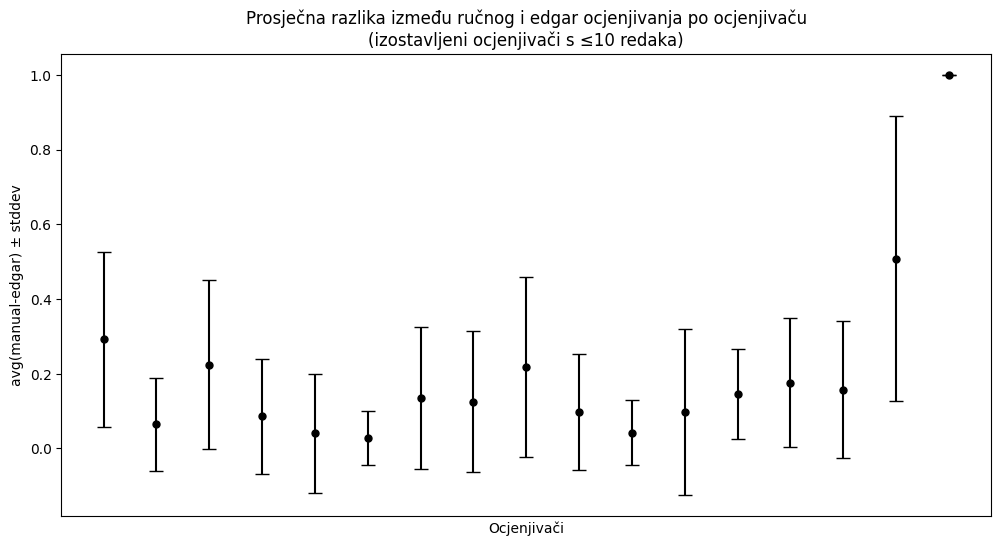

In [20]:
rows_per_teacher = data.groupby("id_app_user").size()

# Filtriramo ocjenjivače s više od 10 redaka
valid_teachers = rows_per_teacher[rows_per_teacher > 10].index
filtered_data = data[data["id_app_user"].isin(valid_teachers)]

stats_by_teacher = (
    filtered_data.groupby("id_app_user")["diff_perc"]
    .agg(["mean", "std"])
    .rename(columns={"mean": "mean_diff", "std": "std_diff"})
)

x_pos = range(len(stats_by_teacher))
y = stats_by_teacher["mean_diff"]
yerr = stats_by_teacher["std_diff"]

plt.figure(figsize=(12, 6))
plt.errorbar(x_pos, y, yerr=yerr, fmt='o', color='black', capsize=5, markersize=5)

plt.xticks([])
plt.xlabel("Ocjenjivači")
plt.ylabel("avg(manual-edgar) ± stddev")
plt.title("Prosječna razlika između ručnog i edgar ocjenjivanja po ocjenjivaču\n(izostavljeni ocjenjivači s ≤10 redaka)")

plt.show()